# Breast Cancer Diagnostic



Breast cancer is the most common cancer among women worldwide accounting 25 percent of all cancer cases and affected 2.1 million people in 2015. Early diagnosis significantly increases the chances of survival. The key challenge in cancer detection is how to classify tumors into malignant or benign. 

Machine Learning techniques can dramatically improves the accuracy of diagnosis. Research indicates that most experienced physicians can diagnose cancer with 79% percent accuracy while 91% percent correct diagnosis is achieved using machine learning techniques.

In this case study, the task is to classify tumors into malignant or benign tumors using features obtained from several cell images. Features are the characterics out of the images such as radius of the cell, texture and so on. And then we feed all these features into our machine learning model. The idea is to teach the machine how to basically classify data without human intervention. 


Dataset: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import learning_curve
import seaborn as sns

# Load and Transform Data

In [2]:
df = pd.read_csv('C:/Temp/training_data_breast_cancer.csv',na_values=['?', 'nan'])
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
#Check for any null values
df[df.isnull().any(axis=1)]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


In [4]:
#Check the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565 entries, 0 to 564
Data columns (total 32 columns):
id                         565 non-null int64
diagnosis                  565 non-null object
radius_mean                565 non-null float64
texture_mean               565 non-null float64
perimeter_mean             565 non-null float64
area_mean                  565 non-null float64
smoothness_mean            565 non-null float64
compactness_mean           565 non-null float64
concavity_mean             565 non-null float64
concave points_mean        565 non-null float64
symmetry_mean              565 non-null float64
fractal_dimension_mean     565 non-null float64
radius_se                  565 non-null float64
texture_se                 565 non-null float64
perimeter_se               565 non-null float64
area_se                    565 non-null float64
smoothness_se              565 non-null float64
compactness_se             565 non-null float64
concavity_se               565 non

In [5]:
#Drop ID column as this is not relevant predicting the result
df.drop('id', axis=1, inplace=True)

In [6]:
# Assign labels to diagnosis. B for 0 and M for 1
y_enc = df.diagnosis.map({'B': 0, 'M': 1})
y_enc

df.drop(['diagnosis'], axis=1, inplace=True) # drop the original y column
df = pd.concat([df, y_enc], axis=1) # add the encoded y column
df.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis'],
      dtype='object')

In [7]:
X = df.loc[:, 'radius_mean' : 'fractal_dimension_worst']
y = df.diagnosis

In [9]:
X.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [10]:
pd.DataFrame(y).columns

Index(['diagnosis'], dtype='object')

# Explanatory Data Analysis

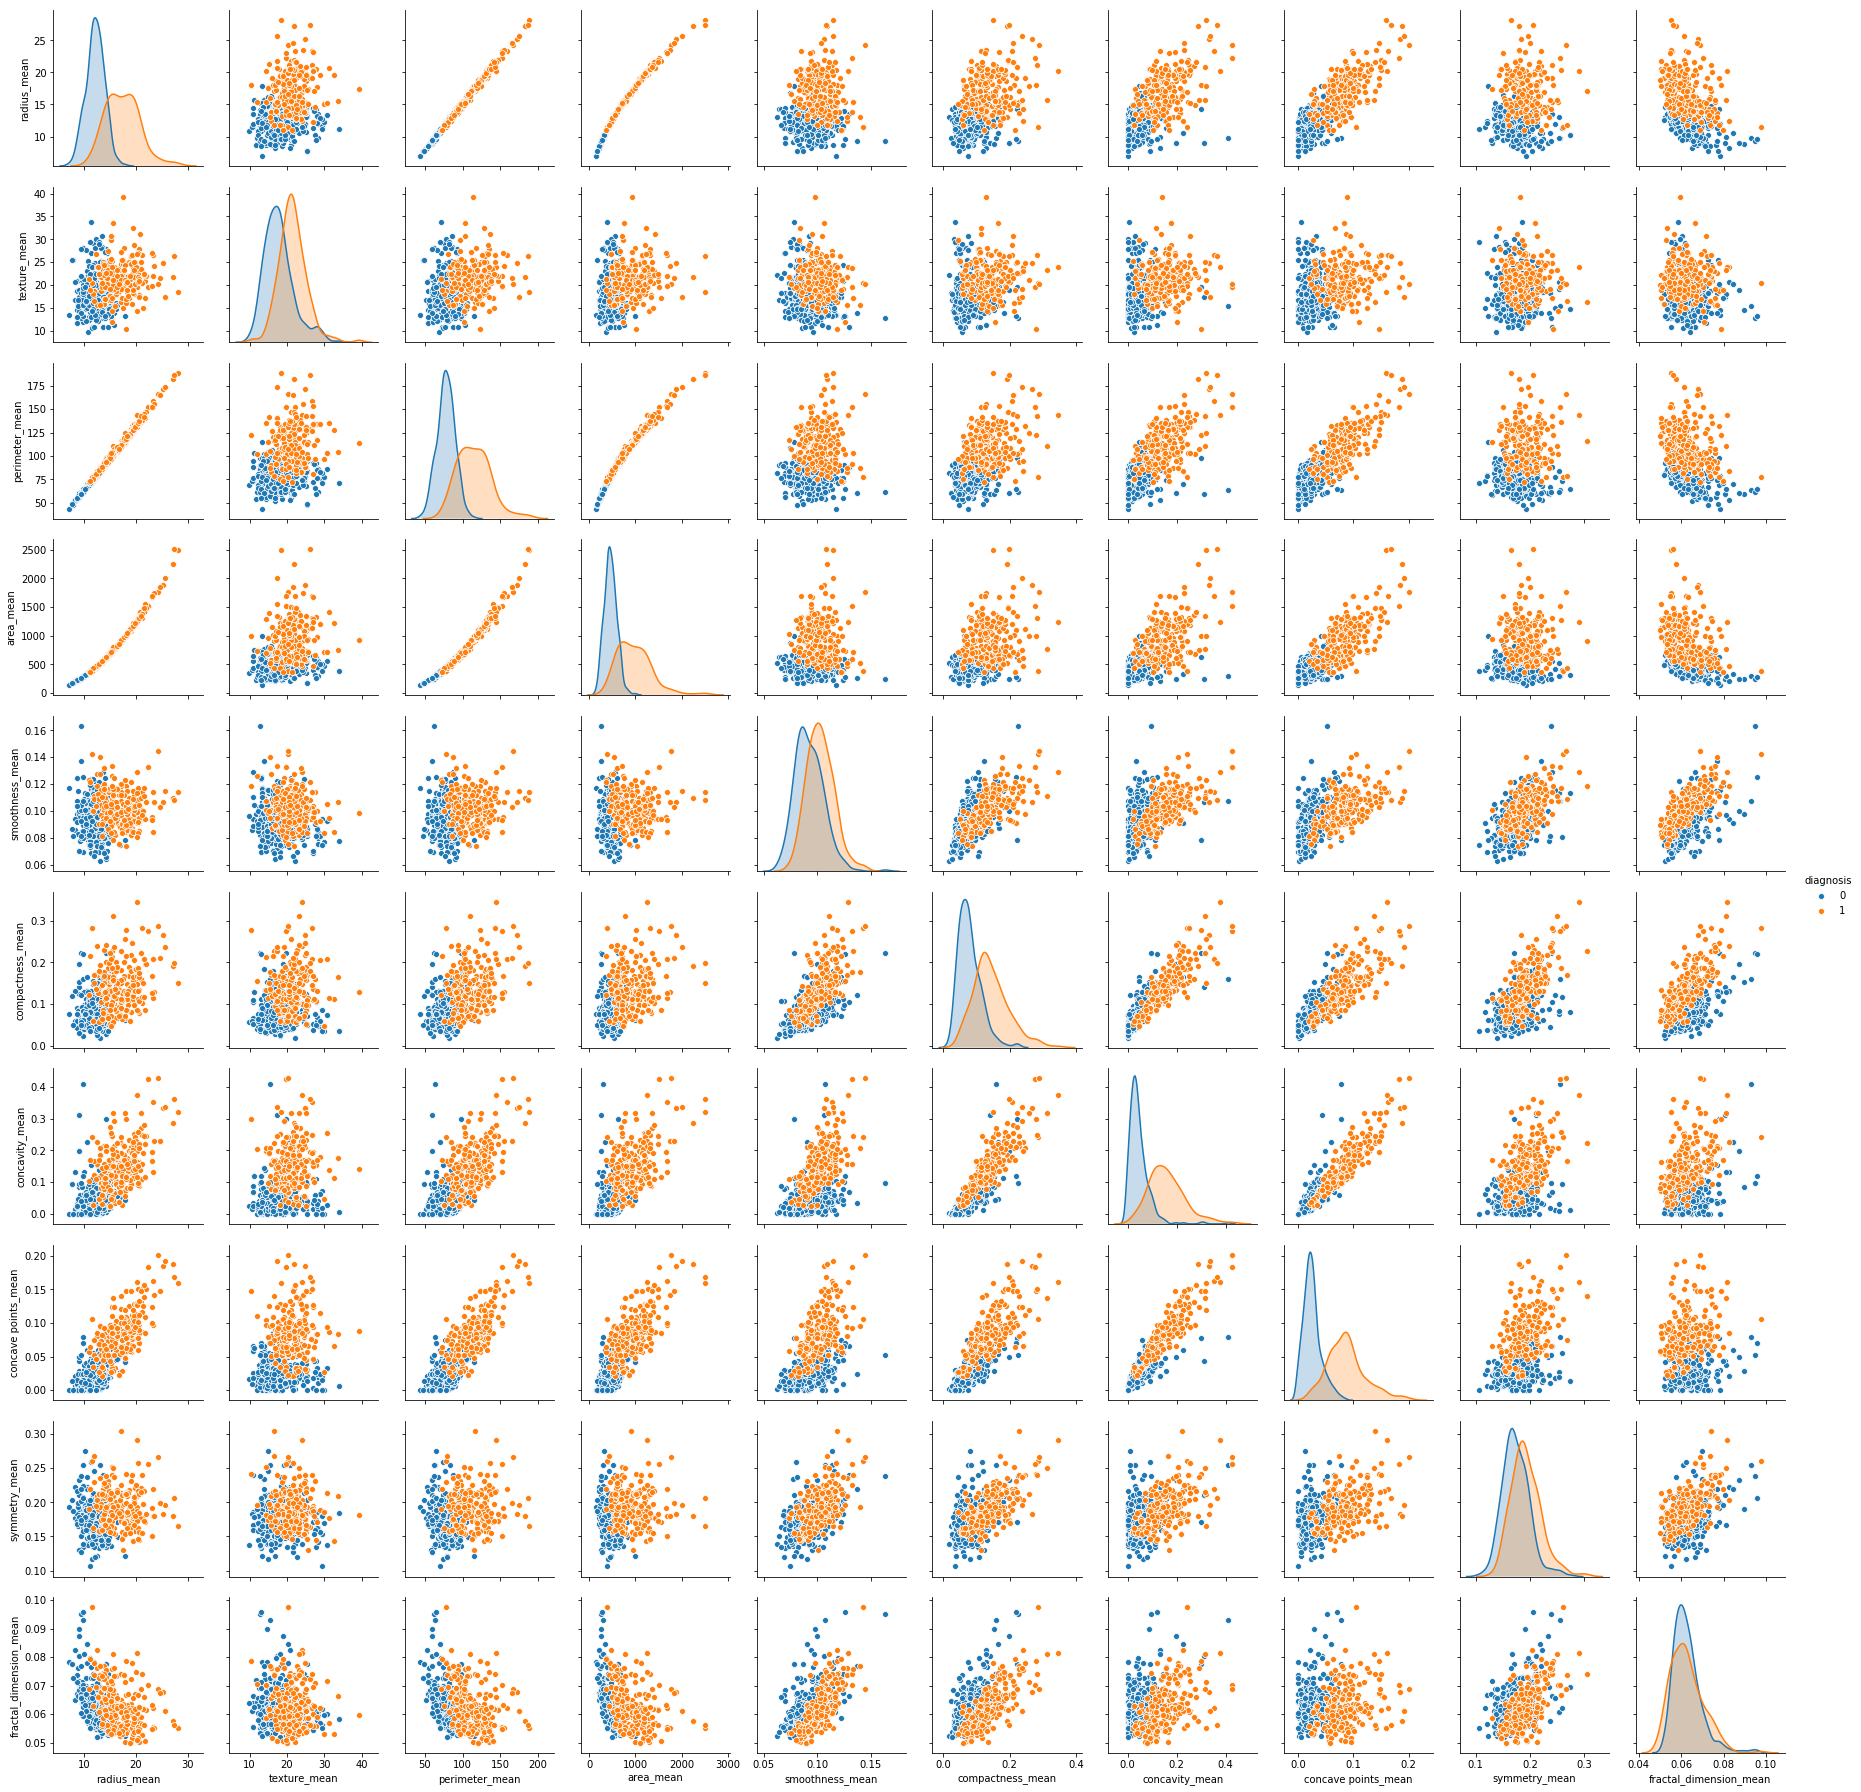

In [15]:
sns.pairplot(df, hue = 'diagnosis', vars = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'] )

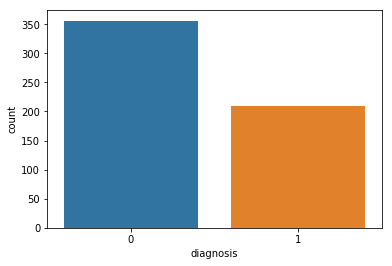

In [17]:
sns.countplot(df['diagnosis'], label = "Count") 

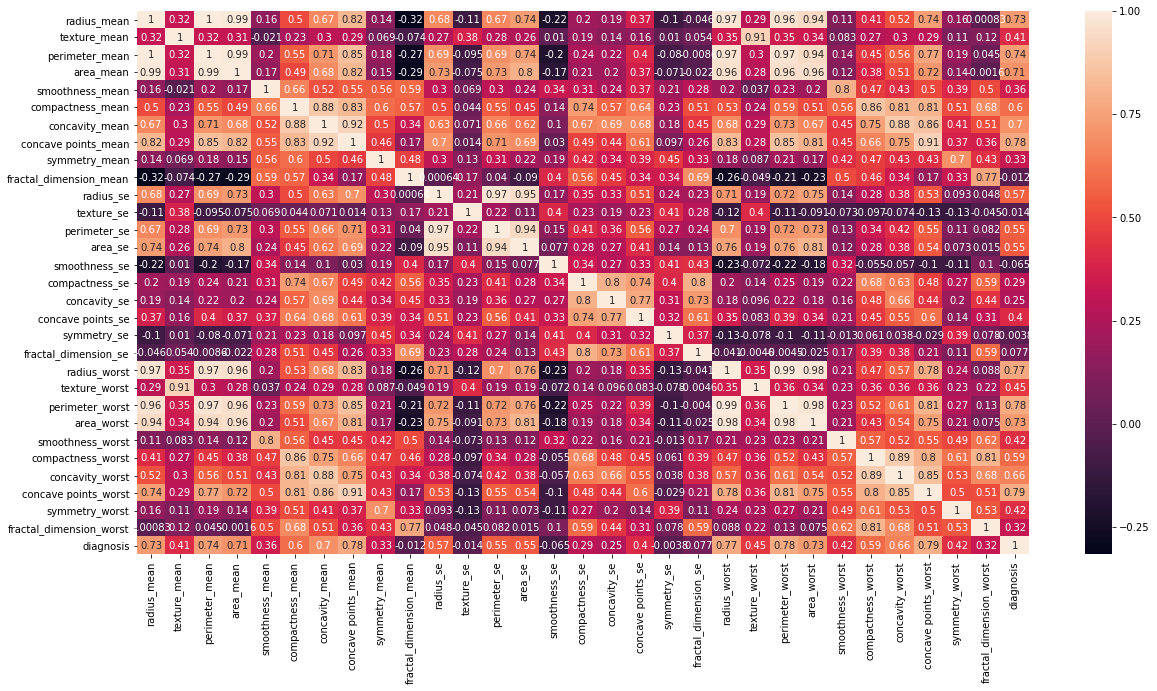

In [18]:
# Let's check the correlation between the variables 
# Strong correlation between the mean radius and mean perimeter, mean area and mean primeter
plt.figure(figsize=(20,10)) 
sns.heatmap(df.corr(), annot=True) 

# Train the Model

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =42)

#Scale the features
scaler_X = StandardScaler()
X_scaled_train = scaler_X.fit_transform(X_train)
X_scaled_test = scaler_X.transform(X_test)

In [27]:
# Dummy Classifier
baseline = DummyClassifier(random_state=42)
baseline.fit(X_scaled_train, y_train)
y_pred_baseline = baseline.predict(X_scaled_test)


In [25]:
#Logistic Regression 
logistic = LogisticRegression(random_state=42)
logistic.fit(X_scaled_train, y_train)
y_pred_logistic = logistic.predict(X_scaled_test)

In [26]:
#SGD Classifier
sgd = SGDClassifier(tol=1e-4, max_iter=1000, verbose=True, random_state=42)
sgd.fit(X_scaled_train, y_train)
y_pred_sgd = sgd.predict(X_scaled_test)


-- Epoch 1
Norm: 171.66, NNZs: 30, Bias: -7.418887, T: 395, Avg. loss: 4.338682
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 136.76, NNZs: 30, Bias: -1.157401, T: 790, Avg. loss: 2.684745
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 110.70, NNZs: 30, Bias: 2.717669, T: 1185, Avg. loss: 2.018763
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 106.80, NNZs: 30, Bias: 7.050800, T: 1580, Avg. loss: 1.160976
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 102.28, NNZs: 30, Bias: 3.862464, T: 1975, Avg. loss: 1.353183
Total training time: 0.01 seconds.
Convergence after 5 epochs took 0.01 seconds


In [33]:
#Gaussian
nb = GaussianNB()
nb.fit(X_scaled_train, y_train)
y_pred_nb = nb.predict(X_scaled_test)

In [34]:
#GridSearchCV SVC

Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1] 
param_grid = {'C': Cs, 'gamma' : gammas}
grid_search = GridSearchCV(SVC(), param_grid)
grid_search.fit(X_scaled_train, y_train)

y_pred_svc = grid_search.predict(X_scaled_test)


print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)

{'C': 10, 'gamma': 0.01}
0.9772151898734177
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [35]:
#KNearest Negighbors
kn = KNeighborsClassifier()
kn.fit(X_scaled_train, y_train)
y_pred_kn = kn.predict(X_scaled_test)

# Evaluation Metrics

## A. Classification Report and Confusion Matrix 

             precision    recall  f1-score   support

          0       0.64      0.64      0.64       111
          1       0.32      0.32      0.32        59

avg / total       0.53      0.53      0.53       170



[Text(0,0.5,'Benign'), Text(0,1.5,'Malignant')]

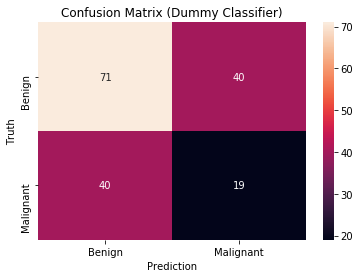

In [28]:
cm = confusion_matrix(y_test, y_pred_baseline)
print(classification_report(y_test, y_pred_baseline))

fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, ax=ax, fmt='d')

ax.set(xlabel='Prediction', ylabel='Truth', title='Confusion Matrix (Dummy Classifier)'); 
ax.xaxis.set_ticklabels(['Benign', 'Malignant'])
ax.yaxis.set_ticklabels(['Benign', 'Malignant'])

             precision    recall  f1-score   support

          0       0.98      0.99      0.99       111
          1       0.98      0.97      0.97        59

avg / total       0.98      0.98      0.98       170



[Text(0,0.5,'Benign'), Text(0,1.5,'Malignant')]

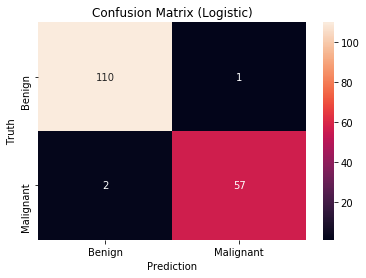

In [29]:
cm = confusion_matrix(y_test, y_pred_logistic)

print(classification_report(y_test, y_pred_logistic))

fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, ax=ax, fmt='d')

ax.set(xlabel='Prediction', ylabel='Truth', title='Confusion Matrix (Logistic)'); 
ax.xaxis.set_ticklabels(['Benign', 'Malignant'])
ax.yaxis.set_ticklabels(['Benign', 'Malignant'])

             precision    recall  f1-score   support

          0       0.97      0.99      0.98       111
          1       0.98      0.95      0.97        59

avg / total       0.98      0.98      0.98       170



[Text(0,0.5,'Benign'), Text(0,1.5,'Malignant')]

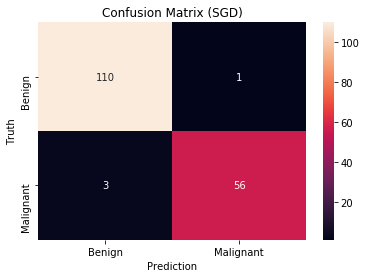

In [30]:
cm = confusion_matrix(y_test, y_pred_sgd)

print(classification_report(y_test, y_pred_sgd))

fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, ax=ax, fmt='d')

ax.set(xlabel='Prediction', ylabel='Truth', title='Confusion Matrix (SGD)'); 
ax.xaxis.set_ticklabels(['Benign', 'Malignant'])
ax.yaxis.set_ticklabels(['Benign', 'Malignant'])

             precision    recall  f1-score   support

          0       0.92      0.94      0.93       111
          1       0.88      0.85      0.86        59

avg / total       0.91      0.91      0.91       170



[Text(0,0.5,'Benign'), Text(0,1.5,'Malignant')]

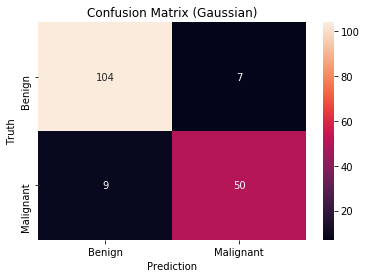

In [36]:
cm = confusion_matrix(y_test, y_pred_nb)

print(classification_report(y_test, y_pred_nb))

fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, ax=ax, fmt='d')

ax.set(xlabel='Prediction', ylabel='Truth', title='Confusion Matrix (Gaussian)'); 
ax.xaxis.set_ticklabels(['Benign', 'Malignant'])
ax.yaxis.set_ticklabels(['Benign', 'Malignant'])

             precision    recall  f1-score   support

          0       0.97      1.00      0.98       111
          1       1.00      0.93      0.96        59

avg / total       0.98      0.98      0.98       170



[Text(0,0.5,'Benign'), Text(0,1.5,'Malignant')]

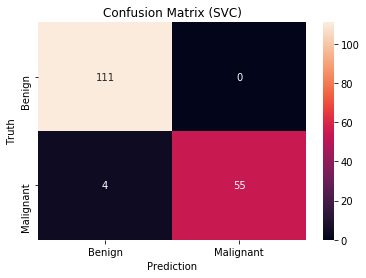

In [37]:
cm = confusion_matrix(y_test, y_pred_svc)

print(classification_report(y_test, y_pred_svc))

fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, ax=ax, fmt='d')

ax.set(xlabel='Prediction', ylabel='Truth', title='Confusion Matrix (SVC)'); 
ax.xaxis.set_ticklabels(['Benign', 'Malignant'])
ax.yaxis.set_ticklabels(['Benign', 'Malignant'])

             precision    recall  f1-score   support

          0       0.96      0.96      0.96       111
          1       0.93      0.93      0.93        59

avg / total       0.95      0.95      0.95       170



[Text(0,0.5,'Benign'), Text(0,1.5,'Malignant')]

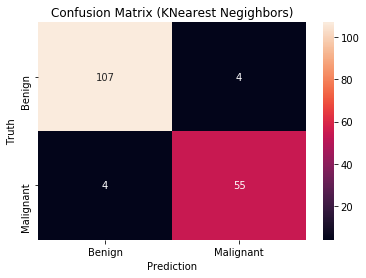

In [38]:
cm = confusion_matrix(y_test, y_pred_kn)

print(classification_report(y_test, y_pred_kn))

fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, ax=ax, fmt='d')

ax.set(xlabel='Prediction', ylabel='Truth', title='Confusion Matrix (KNearest Negighbors)'); 
ax.xaxis.set_ticklabels(['Benign', 'Malignant'])
ax.yaxis.set_ticklabels(['Benign', 'Malignant'])

##  B. ROC curve and Area under the ROC curve

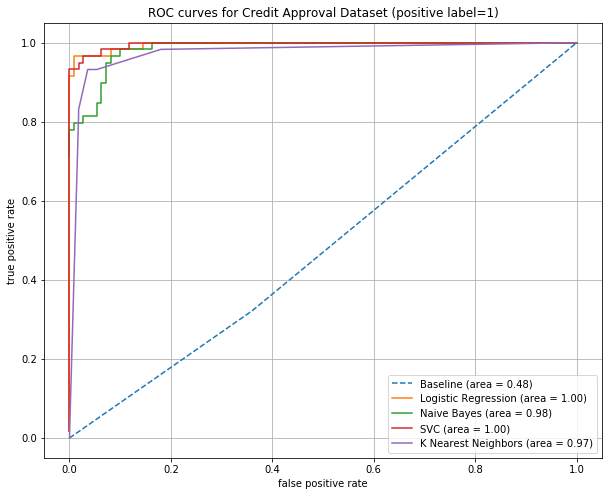

In [40]:
# Baseline
baseline = DummyClassifier(random_state=42)
baseline.fit(X_scaled_train, y_train)
y_confidence_baseline = baseline.predict_proba(X_scaled_test)

# predict_proba: prediction confidence
# decision_function: distance to the decision boundary/hyperplane

# y_confidence_baseline[:, 0] returns probabilities for class 0
# y_confidence_baseline[:, 1] returns probabilities for class 1
fpr_baseline, tpr_baseline, _ = roc_curve(y_test, y_confidence_baseline[:, 1], pos_label=1)
auc_baseline = auc(fpr_baseline, tpr_baseline)

# Logistic Regression
y_confidence_logistic = logistic.predict_proba(X_scaled_test)
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_confidence_logistic[:, 1], pos_label=1)
auc_logistic = auc(fpr_logistic, tpr_logistic)

# Naive Bayes
y_confidence_nb = nb.predict_proba(X_scaled_test)
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_confidence_nb[:, 1], pos_label=1)
auc_nb = auc(fpr_nb, tpr_nb)

# Grid Search - Support Vector Machine
y_confidence_svc = grid_search.decision_function(X_scaled_test)
fpr_svc, tpr_svc, _ = roc_curve(y_test, y_confidence_svc, pos_label=1)
auc_svc = auc(fpr_svc, tpr_svc)

# K-nearest Neighbor
y_confidence_kn = kn.predict_proba(X_scaled_test)
fpr_kn, tpr_kn, _ = roc_curve(y_test, y_confidence_kn[:, 1], pos_label=1)
auc_kn = auc(fpr_kn, tpr_kn)

# Plot the ROCs
fig, ax = plt.subplots(figsize=(10, 8))

ax.plot(fpr_baseline, tpr_baseline, label='Baseline (area = %0.2f)' % auc_baseline,
        linestyle='dashed')
ax.plot(fpr_logistic, tpr_logistic, label='Logistic Regression (area = %0.2f)' % auc_logistic)
ax.plot(fpr_nb, tpr_nb, label='Naive Bayes (area = %0.2f)' % auc_nb)
ax.plot(fpr_svc, tpr_svc, label='SVC (area = %0.2f)' % auc_svc)
ax.plot(fpr_kn, tpr_kn, label='K Nearest Neighbors (area = %0.2f)' % auc_kn)

# bigger area is better
ax.set(xlabel='false positive rate', ylabel='true positive rate',
       title='ROC curves for Credit Approval Dataset (positive label=1)')
ax.legend()
ax.grid()
plt.show()